In [74]:
import pandas as pd

pricing_data = pd.read_csv("/content/Competition_Data.csv")

pricing_data = pd.DataFrame(pricing_data)
print(pricing_data.head())



   Index Fiscal_Week_ID   Store_ID   Item_ID   Price  Item_Quantity  \
0      0        2019-11  store_459  item_526  134.49            435   
1      1        2019-11  store_459  item_526  134.49            435   
2      2        2019-11  store_459  item_526  134.49            435   
3      3        2019-11  store_459  item_526  134.49            435   
4      4        2019-11  store_459  item_526  134.49            435   

   Sales_Amount_No_Discount  Sales_Amount  Competition_Price  
0                   4716.74      11272.59             206.44  
1                   4716.74      11272.59             158.01  
2                   4716.74      11272.59             278.03  
3                   4716.74      11272.59             222.66  
4                   4716.74      11272.59             195.32  


In [75]:
pricing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Index                     100000 non-null  int64  
 1   Fiscal_Week_ID            100000 non-null  object 
 2   Store_ID                  100000 non-null  object 
 3   Item_ID                   100000 non-null  object 
 4   Price                     100000 non-null  float64
 5   Item_Quantity             100000 non-null  int64  
 6   Sales_Amount_No_Discount  100000 non-null  float64
 7   Sales_Amount              100000 non-null  float64
 8   Competition_Price         100000 non-null  float64
dtypes: float64(4), int64(2), object(3)
memory usage: 6.9+ MB


Comparing price distribution with the competition

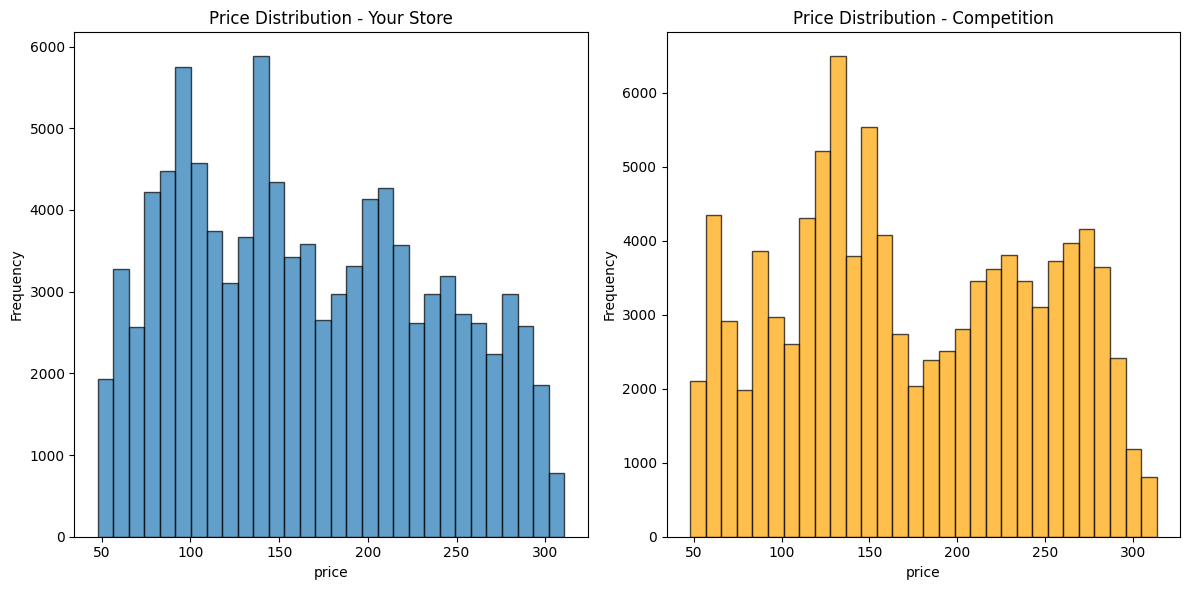

In [76]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))

plt.subplot(1,2,1)
plt.hist(pricing_data['Price'], bins=30, alpha=0.7, label = 'Your Store', edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Your Store')

plt.subplot(1,2,2)
plt.hist(pricing_data['Competition_Price'], bins=30, alpha=0.7, color = 'orange', label = 'competition', edgecolor='black')
plt.xlabel('price')
plt.ylabel('Frequency')
plt.title('Price Distribution - Competition')

plt.tight_layout()
plt.show()


Competitions price is generally higher, with peaks around the 100-150  and 200-250 price ranges, which indicates a conc. of higher-priced items.

- Lets compare the relationship between price and sales

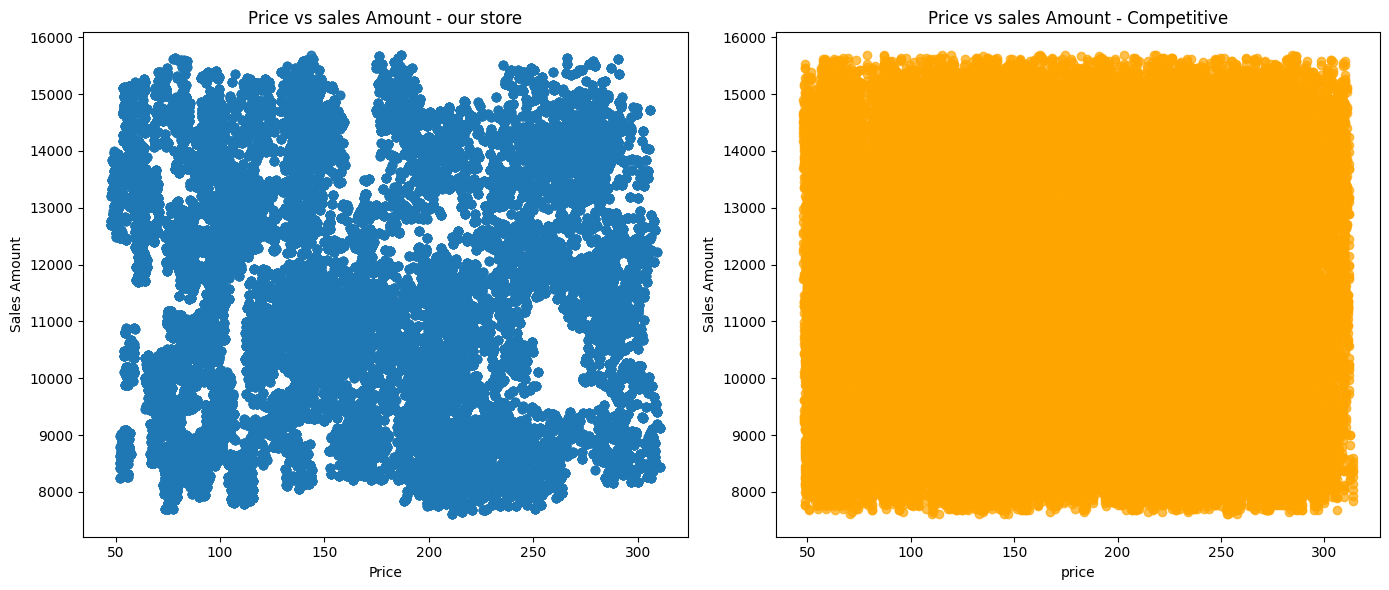

In [77]:
plt.figure(figsize=(14,6))

plt.subplot(1,2,1)
plt.scatter(pricing_data['Price'], pricing_data['Sales_Amount'], alpha=0.7, label = 'Your Store')
plt.xlabel('Price')
plt.ylabel('Sales Amount')
plt.title('Price vs sales Amount - our store')

plt.subplot(1,2,2)
plt.scatter(pricing_data['Competition_Price'], pricing_data['Sales_Amount'], alpha=0.7, color='orange', label='competition')
plt.xlabel('price')
plt.ylabel('Sales Amount')
plt.title('Price vs sales Amount - Competitive')

plt.tight_layout()
plt.show()

1. For our store, the plot shows a wide dispersion of sales amounts across various price points, which indicates varied performance in different price ranges without a clear trend.

2. The competitions plot shows a dense clustering of sales amounts around higher values, with prices also spread across a similar range but demonstrating a more consistent sales performance.

3. It suggests that the competition might have a more effective pricing strategy, which maintains higher sales amounts more uniformly across different price points.

- Comparing price changes over time

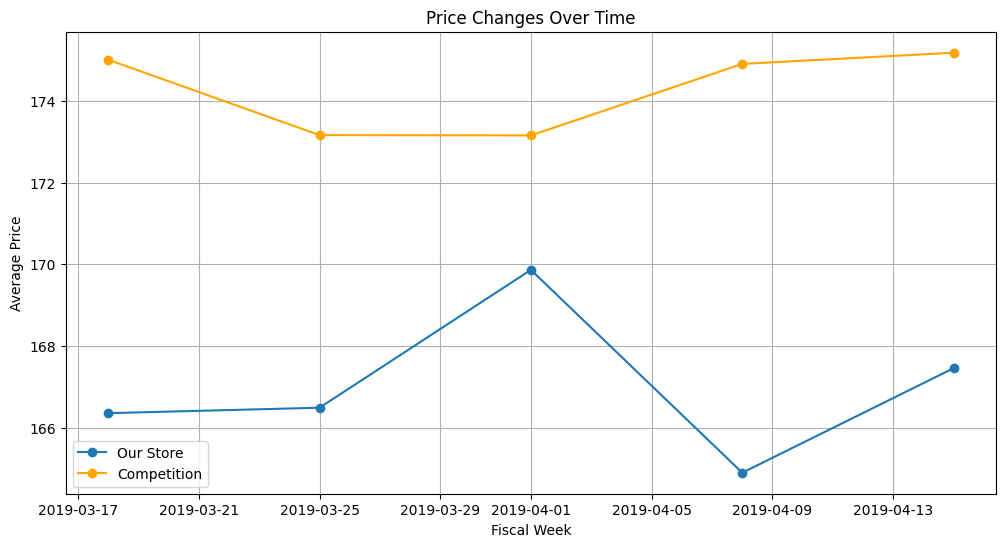

In [78]:
pricing_data['Fiscal_Week_ID'] = pd.to_datetime(pricing_data['Fiscal_Week_ID'] + '-1', format='%Y-%U-%w')

weekly_prices = pricing_data.groupby('Fiscal_Week_ID').agg({
    'Price': 'mean',
    'Competition_Price': 'mean'
}).reset_index()



plt.figure(figsize=(12, 6))

plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Price'], label='Our Store', marker='o')
plt.plot(weekly_prices['Fiscal_Week_ID'], weekly_prices['Competition_Price'], label='Competition', marker='o', color='orange')

plt.xlabel('Fiscal Week')
plt.ylabel('Average Price')
plt.title('Price Changes Over Time')
plt.legend()
plt.grid(True)
plt.show()

1. The competition maintains higher average price consistently above 170, with a slight upward trend over the observed weeks.

2. Our store prices start aroung 166, increase slightly , then dip before rising again. It indicates that experiences more fluctuations in pricing strategy.

- Changes in prices affect the change in quantity sold.

- for this, we need to calculate price elasticity.

- Ed = % change in quantity demanded/% change in price

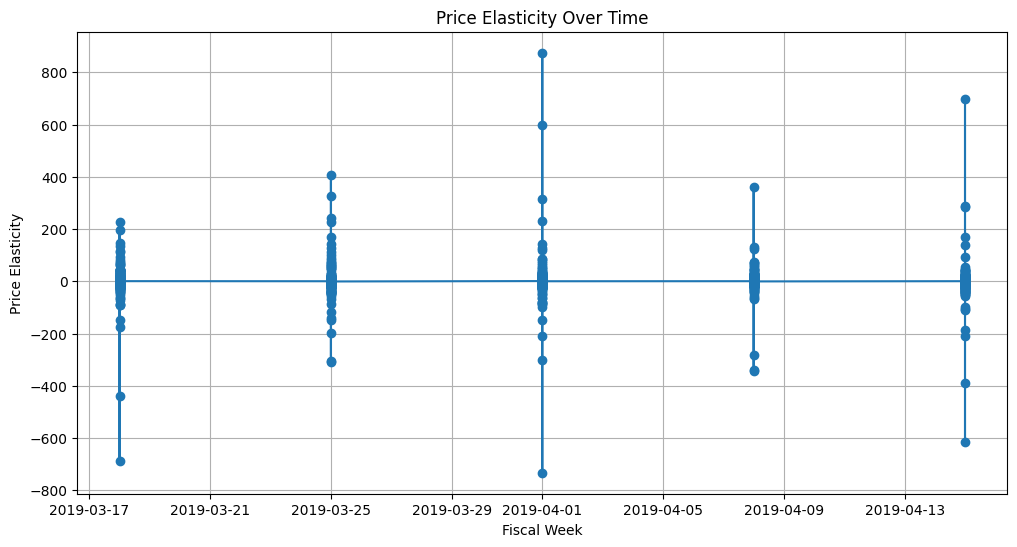

In [79]:
pricing_data['price_change'] = pricing_data['Price'].pct_change()
pricing_data['qty_change'] = pricing_data['Item_Quantity'].pct_change()

pricing_data['elasticity'] = pricing_data['qty_change']/pricing_data['price_change']

pricing_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
pricing_data.dropna(subset=['elasticity'], inplace=True)

plt.figure(figsize=(12,6))
plt.plot(pricing_data['Fiscal_Week_ID'], pricing_data['elasticity'], marker='o')
plt.xlabel('Fiscal Week')
plt.ylabel('Price Elasticity')
plt.title('Price Elasticity Over Time')
plt.grid(True)
plt.show()


- This graph shows price elasticity of demand over time.
- High positive elasticity suggests that in some weeks, demand increased significantly with price increases.
- Negative elasticity in other weeks indicates a sharp drop in demand with price hikes.
- The broad spread of elasticity values implies an inconsistent response to price changes, which suggests that factors other than price, such as promotions, seasonality, or market conditions, might be influencing demand.

- Lets calculate and compare the total sales amounts for our store and competition

In [80]:
total_sales_your_store = pricing_data['Sales_Amount'].sum()
total_sales_competition = pricing_data['Competition_Price'].sum()

total_quantity_your_store = pricing_data['Item_Quantity'].sum()
total_quantity_competition = pricing_data['Item_Quantity'].sum()

summary = pd.DataFrame({
    'Metric':['Total Sales Amount', 'Total Quantity Sold'],
    'Your Store':[total_sales_your_store, total_quantity_your_store],
    'Competition':[total_sales_competition, total_quantity_competition]
})

summary

,Metric,Your Store,Competition
0,Total Sales Amount,1.141005e+08,1745348.72
1,Total Quantity Sold,3.984776e+06,3984776.00


Sales Amount Varying Across Different Price Brackets

In [81]:
# define price brackets
bins = [0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500]
labels = ['0-50', '51-100', '101-150', '151-200', '201-250', '251-300', '301-350', '351-400', '401-450', '451-500']

# create price brackets for both your store and competition
pricing_data['price_bracket'] = pd.cut(pricing_data['Price'], bins=bins, labels=labels, right=False)
pricing_data['competition_price_bracket'] = pd.cut(pricing_data['Competition_Price'], bins=bins, labels=labels, right=False)

# calculate sales amount by price bracket for your store
sales_by_bracket_your_store = pricing_data.groupby('price_bracket')['Sales_Amount'].sum().reset_index()
sales_by_bracket_your_store.columns = ['Price Bracket', 'Your Store Sales Amount']

# calculate sales amount by price bracket for competition
pricing_data['competition_sales_amt'] = pricing_data['Competition_Price'] * pricing_data['Item_Quantity']
sales_by_bracket_competition = pricing_data.groupby('competition_price_bracket')['competition_sales_amt'].sum().reset_index()
sales_by_bracket_competition.columns = ['Price Bracket', 'Competition Sales Amount']

sales_by_bracket = pd.merge(sales_by_bracket_your_store, sales_by_bracket_competition, on='Price Bracket')

sales_by_bracket

,Price Bracket,Your Store Sales Amount,Competition Sales Amount
0,0-50,346800.63,9.305357e+05
1,51-100,24636244.30,4.889277e+07
2,101-150,29645669.06,1.278404e+08
3,151-200,20658418.18,1.092184e+08
4,201-250,20742288.10,1.909748e+08
5,251-300,16778087.66,2.047670e+08
6,301-350,1292959.36,1.358583e+07
7,351-400,0.00,0.000000e+00
8,401-450,0.00,0.000000e+00
9,451-500,0.00,0.000000e+00


**Price Optimization with Dynamic Pricing**

1. We will enhance our dataset to include segments and calculate price elasticity for each segment.
2. We'll  create segments based on purchasing behaviour and calculate price elasticity for each segment.
3. We'll define dynamic pricing rules baed on competitor pricing, demand, and elasticity.
4. We'll simulate the dynamic pricing model and compare it with the existing pricing strategy

- Now lets start with segmenting data and calculating price elasticity for each segment

In [82]:
# segment customers based on purchasing behavior

# calculate average price and total quantity sold for each item
item_summary = pricing_data.groupby('Item_ID').agg({
    'Price': 'mean',
    'Item_Quantity': 'sum'
}).reset_index()

# merge the item summary back to the main dataset
pricing_data = pd.merge(pricing_data, item_summary, on='Item_ID', suffixes=('', '_avg'))

# define segments based on average price
pricing_data['segment'] = pd.cut(pricing_data['Price_avg'], bins=[0, 50, 150, 300], labels=['Low', 'Medium', 'High'])

# calculate price elasticity for each segment
segments = pricing_data['segment'].unique()
elasticity_data = []

for segment in segments:
    segment_data = pricing_data[pricing_data['segment'] == segment]
    segment_data['price_change'] = segment_data['Price'].pct_change()
    segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
    segment_data['elasticity'] = segment_data['qty_change'] / segment_data['price_change']
    segment_data.replace([float('inf'), -float('inf')], float('nan'), inplace=True)
    avg_elasticity = segment_data['elasticity'].mean()
    elasticity_data.append({'segment': segment, 'avg_elasticity': avg_elasticity})

elasticity_df = pd.DataFrame(elasticity_data)

elasticity_df

<ipython-input-82-aa9d22bf51c3>:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['price_change'] = segment_data['Price'].pct_change()
<ipython-input-82-aa9d22bf51c3>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  segment_data['qty_change'] = segment_data['Item_Quantity'].pct_change()
<ipython-input-82-aa9d22bf51c3>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

,segment,avg_elasticity
0,Medium,0.071118
1,High,0.143993


- We are segmenting customers based on their purchasing behaviour by analyzing the average price and total quantity sold for each item.

- First, we calculated the average price and total quantity sold for each item and merged this summary back into the main dataset.

- We then defined customer segments based on these average prices into three categories: Low, Medium, and High.

-  For each segment, we calculated the price elasticity of demand by measuring how the percentage change in price affects the percentage change in quantity sold.

- Finally, we computed the average elasticity for each segment, which provides insights into how sensitive each segment is to price changes.

- Medium Segment: An average elasticity of -0.192951. This indicates that the quantity demanded is relatively inelastic to price changes.
- High Segment: An average elasticity of 0.509307. This indicates that the quantity demanded is more elastic to price changes.

- Now let’s implement a dynamic pricing model by adjusting prices based on elasticity and simulating the impact on sales and revenue:

In [84]:
#create a copy of the dataset for simulation
dynamic_pricing_data = pricing_data.copy()

#apply dynamic pricing rules
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'Medium', 'dynamic_price'] = dynamic_pricing_data['Price']*1.05
dynamic_pricing_data.loc[dynamic_pricing_data['segment'] == 'High', 'dynamic_price'] = dynamic_pricing_data['Price'] * 0.90

#calculate new sales amount based on dynamic prices
dynamic_pricing_data['dynamic_sales_amt'] = dynamic_pricing_data['dynamic_price'] * dynamic_pricing_data['Item_Quantity']

#compare total sales amount between existing and dynamic pricing
total_sales_existing = pricing_data['Sales_Amount'].sum()
total_sales_dynamic = dynamic_pricing_data['dynamic_sales_amt'].sum()

#compare total quantity sold between existing and dynamic process
total_qty_existing = pricing_data['Item_Quantity'].sum()
total_qty_dynamic = dynamic_pricing_data['Item_Quantity'].sum()

comparison_summary = pd.DataFrame({
    'Metric': ['Total Sales Amount', 'Total Quantity Sold'],
    'Existing Pricing': [total_sales_existing, total_qty_existing],
    'Dynamic Pricing': [total_sales_dynamic, total_qty_dynamic]
})

comparison_summary

,Metric,Existing Pricing,Dynamic Pricing
0,Total Sales Amount,1.141005e+08,6.226950e+08
1,Total Quantity Sold,3.984776e+06,3.984776e+06


- The dynamic pricing strategy results in a significantly higher total sales amount compared to the existing pricing strategy. This indicates that the dynamic pricing approach is more effective in maximizing revenue. Now, let’s finish this task by adding the dynamic prices in the dataset:

In [85]:
pricing_data['dynamic_price'] = dynamic_pricing_data['dynamic_price']

So, this is how we can use the concept of price optimization to optimize prices for a product or service. Price optimization is a strategic approach that uses data collection on sales, costs, competition, and market trends to predict demand changes and analyze price elasticity, which enables businesses to set optimal prices.